# 1. 데이터 로드 & 확인
**pandas 라이브러리 사용 (데이터 로드 및 확인)**

In [1]:
import pandas as pd  # 데이터 처리를 위한 라이브러리

# CSV 파일 불러오기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"

# 첫 번째 컬럼을 인덱스로 설정하여 데이터프레임 불러오기
df = pd.read_csv(url, index_col=0)

# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# 2. 데이터 전처리
## 2-1. 결측치 확인
**사용 라이브러리: pandas**

In [2]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 2-2. Label Encoding (문자 데이터를 숫자로 변환)
**사용 라이브러리: sklearn.preprocessing.LabelEncoder**

In [3]:
from sklearn.preprocessing import LabelEncoder  # 문자 데이터를 숫자로 변환

# 'Sex' 컬럼을 숫자로 변환 (Male=0, Female=1, Infant=2)
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# 변환된 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# 3. 데이터 분할 (훈련 데이터 & 테스트 데이터)
## 3-1. 특성과 타겟 분리
**사용 라이브러리: pandas**

In [4]:
# 예측해야 할 값 'Rings'을 y로 설정하고, 나머지는 X로 설정
X = df.drop(columns=['Rings'])
y = df['Rings']

## 3-2. 데이터 분할 (train-test split)
**사용 라이브러리: sklearn.model_selection.train_test_split**

In [5]:
from sklearn.model_selection import train_test_split  # 데이터 분할 라이브러리

# 80% 훈련 데이터, 20% 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print("\n 데이터 크기 확인:")
print("X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)


 데이터 크기 확인:
X_train: (3341, 8) X_test: (836, 8) y_train: (3341,) y_test: (836,)


#  4. 회귀 모델 학습 및 평가
## 4-1. 선형 회귀 (Linear Regression)
**사용 라이브러리: sklearn.linear_model.LinearRegression, sklearn.metrics.mean_squared_error**

In [6]:
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리

In [7]:
from sklearn.linear_model import LinearRegression  # 선형 회귀 모델
from sklearn.metrics import mean_squared_error  # RMSE 평가 지표

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# 평균제곱근오차 (RMSE)
print("\n Linear Regression 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 Linear Regression 평균제곱근오차: 2.2500084342275777


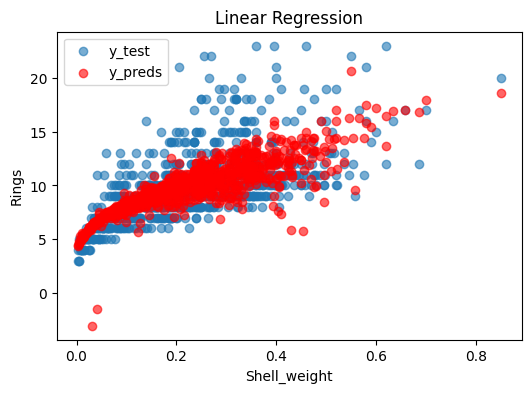

In [8]:
# 🔹 선형 회귀 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test['Shell_weight'], y_preds, c='r', label='y_preds', alpha=0.6)
plt.title("Linear Regression")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()

## 4-2. 결정 트리 회귀 (Decision Tree Regressor)
**사용 라이브러리: sklearn.tree.DecisionTreeRegressor**

In [9]:
from sklearn.tree import DecisionTreeRegressor  # 결정 트리 모델

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("\n Decision Tree 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 Decision Tree 평균제곱근오차: 3.133588676011997


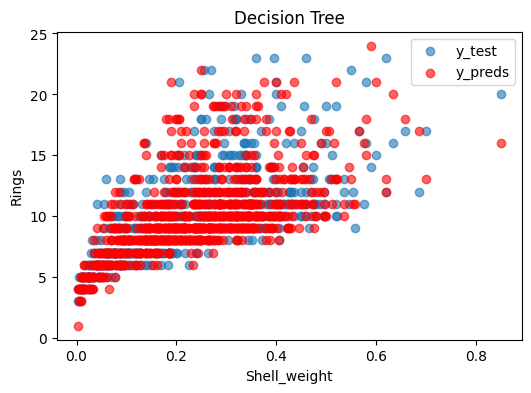

In [10]:
# 🔹 결정 트리 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test['Shell_weight'], y_preds, c='r', label='y_preds', alpha=0.6)
plt.title("Decision Tree")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()

## 4-3. 랜덤 포레스트 회귀 (Random Forest Regressor)
**사용 라이브러리: sklearn.ensemble.RandomForestRegressor**

In [11]:
from sklearn.ensemble import RandomForestRegressor  # 랜덤 포레스트 모델

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("\n Random Forest 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 Random Forest 평균제곱근오차: 2.25642463935981


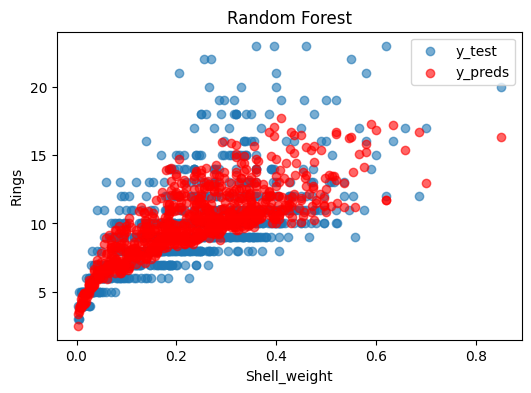

In [12]:
# 🔹 랜덤 포레스트 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test['Shell_weight'], y_preds, c='r', label='y_preds', alpha=0.6)
plt.title("Random Forest")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()

## 4-4. 서포트 벡터 회귀 (SVR)
**사용 라이브러리: sklearn.svm.SVR**

In [13]:
from sklearn.svm import SVR  # 서포트 벡터 회귀 모델

model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("\n SVR 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 SVR 평균제곱근오차: 2.3681484021218404


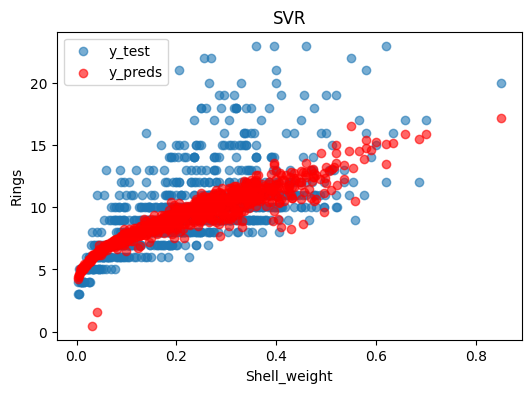

In [14]:
# 🔹 SVR 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test['Shell_weight'], y_preds, c='r', label='y_preds', alpha=0.6)
plt.title("SVR")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.legend()
plt.show()

# 5. 모델별 학습 및 시각화
**사용 라이브러리: matplotlib.pyplot**

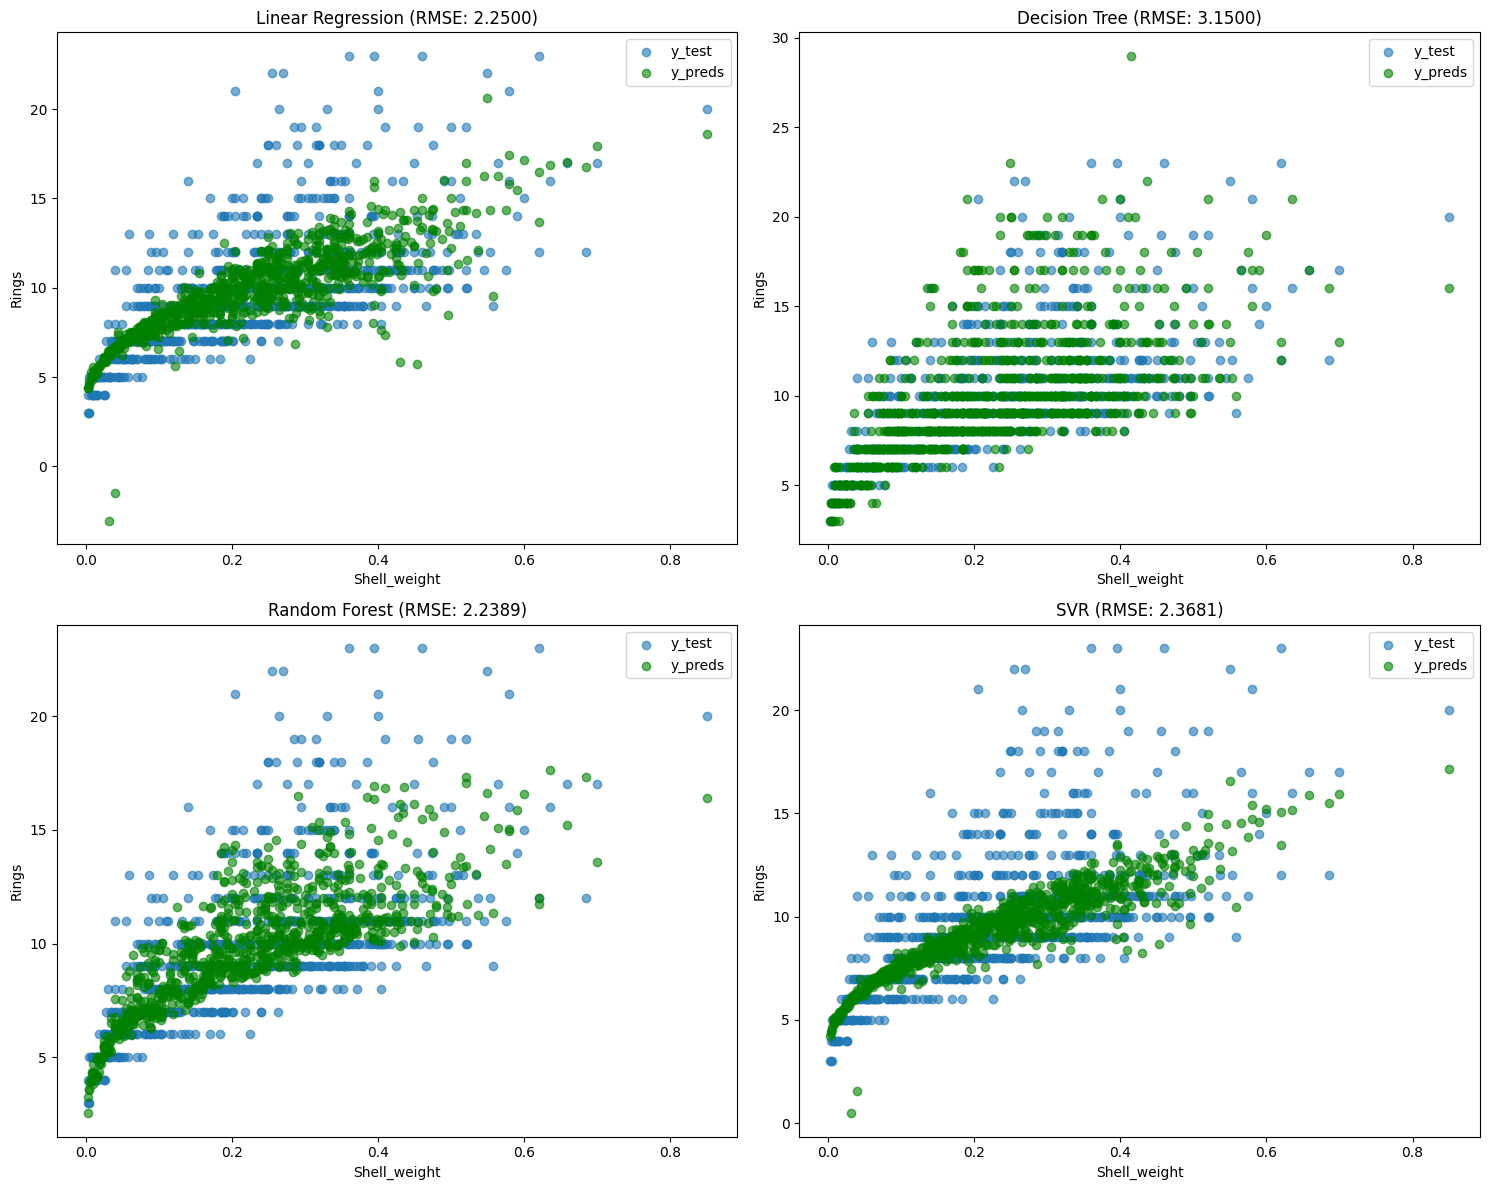

In [15]:
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리

# 회귀 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(kernel='linear')
}

# 모델 학습 및 예측
results = {}
plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # 모델 학습
    y_preds = model.predict(X_test)  # 예측값
    rmse = mean_squared_error(y_test, y_preds, squared=False)  # RMSE 계산
    results[name] = rmse  # RMSE 저장

    # 산점도 시각화
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test['Shell_weight'], y_test, label='y_test', alpha=0.6)
    plt.scatter(X_test['Shell_weight'], y_preds, c='g', label='y_preds', alpha=0.6)
    plt.title(f"{name} (RMSE: {rmse:.4f})")
    plt.xlabel("Shell_weight")
    plt.ylabel("Rings")
    plt.legend()

plt.tight_layout()
plt.show()

# 6. 최종 RMSE 비교

In [16]:
# RMSE 출력
print("\n 모델별 RMSE 비교")
for name, rmse in results.items():
    print(f"{name} 평균제곱근오차:", rmse)


 모델별 RMSE 비교
Linear Regression 평균제곱근오차: 2.2500084342275777
Decision Tree 평균제곱근오차: 3.1499601273393525
Random Forest 평균제곱근오차: 2.238942927057769
SVR 평균제곱근오차: 2.3681484021218404
